In [2]:
# Code taken from https://www.kaggle.com/arpandhatt/satellite-image-classification
#Here are some standard libraries that are loaded when you 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualize satellite images
from skimage.io import imshow # visualize satellite images

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout # components of network
from keras.models import Sequential # type of model

/Users/cstho/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
x_train_set_fpath = '/Users/cstho/Desktop/music_tech_fest/hackSatellite/deepsat-sat4/X_test_sat4.csv'
y_train_set_fpath = '/Users/cstho/Desktop/music_tech_fest/hackSatellite/deepsat-sat4/y_test_sat4.csv'
print ('Loading Training Data')
X_train = pd.read_csv(x_train_set_fpath)
print ('Loaded 28 x 28 x 4 images')

Y_train = pd.read_csv(y_train_set_fpath)
print ('Loaded labels')


Loading Training Data
Loaded 28 x 28 x 4 images
Loaded labels


In [5]:
X_train = X_train.as_matrix()
Y_train = Y_train.as_matrix()
print ('We have',X_train.shape[0],'examples and each example is a list of',X_train.shape[1],'numbers with',Y_train.shape[1],'possible classifications.')



('We have', 99999, 'examples and each example is a list of', 3136, 'numbers with', 4, 'possible classifications.')


In [6]:
#First we have to reshape each of them from a list of numbers to a 28*28*4 image.
X_train_img = X_train.reshape([99999,28,28,4]).astype(float)
print (X_train_img.shape)

(99999, 28, 28, 4)


In [56]:
X_train_img[ix,:,:,0:3][0][0]

array([185., 163., 141.])

/Users/cstho/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/cstho/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


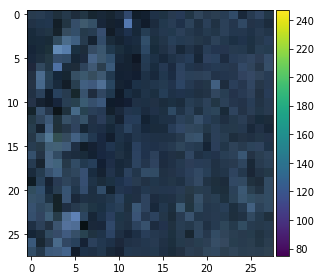

Barren Land


In [7]:
#Let's take a look at one image. Keep in mind the channels are R,G,B, and I(Infrared)
ix = 5#Type a number between 0 and 99,999 inclusive
imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(float)) #Only seeing the RGB channels
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

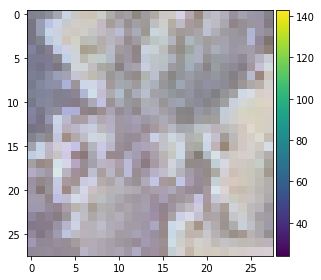

Trees


In [256]:
#Let's take a look at one image. Keep in mind the channels are R,G,B, and I(Infrared)
ix = 200#Type a number between 0 and 99,999 inclusive
imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(float)) #Only seeing the RGB channels
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [8]:
model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax')
])

In [9]:
X_train = X_train/255

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12548     
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
Train on 98999 samples, validate on 1000 samples
Epoch 1/5
98999/98999 [==============================] - 26s 260us/step - loss: 1.3489 - acc: 0.3559 - val_loss: 1.3312 - val_acc: 0.3870
Epoch 2/5
98999/98999 [==============================] - 25s 253us/step - loss: 1.3433 - acc: 0.3561 - val_loss: 1.3309 - val_acc: 0.3860
Epoch 3/5
98999/98999 [==============================] - 25s 254us/step - loss: 1.3414 - acc: 0.3562 - val_loss: 1.3335 - val_acc: 0.3850
Epoch 4/5
98999/98999 [==============================] - 25s 255us/step - loss: 1.3401 - acc: 0.3563 - val_loss: 1.3331 - val_acc: 0.3850
Epoch 5/5
98999/98999 [==============================] - 24s 238u

In [13]:
from scipy import misc
import image_slicer

In [142]:
import requests
import json

response = requests.get("https://mtf-sat.synvinkel.org/timeseries/london?apikey=biscayabukten")
json_data = json.loads(response.text)
r = requests.get(json_data["images"][0]["url"])
BytesIO(r.content)




In [229]:
# Splitting
image_slicer.slice('/Users/cstho/Desktop/music_tech_fest/hackSatellite/test_images/original_02_03.png', 8)

(<Tile #1 - original_02_03_01_01.png>,
 <Tile #2 - original_02_03_01_02.png>,
 <Tile #3 - original_02_03_01_03.png>,
 <Tile #4 - original_02_03_02_01.png>,
 <Tile #5 - original_02_03_02_02.png>,
 <Tile #6 - original_02_03_02_03.png>,
 <Tile #7 - original_02_03_03_01.png>,
 <Tile #8 - original_02_03_03_02.png>,
 <Tile #9 - original_02_03_03_03.png>)

In [247]:
arr_sliced = misc.imread("/Users/cstho/Desktop/music_tech_fest/hackSatellite/test_images/original_02_03 copy.png")

In [248]:
arr_final_la = np.array([arr_sliced.flatten()])

In [249]:
preds = model.predict(arr_final_la, verbose=1)

1/1 [==============================] - 0s 939us/step


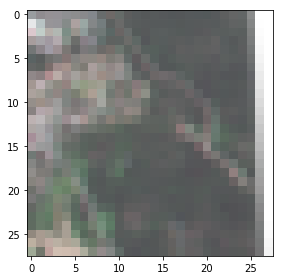

Prediction:
0.0% probability barren land,
0.0% probability trees,
0.0% probability grassland,
100.0% probability other

Ground Truth: 
Other


In [250]:
ix = 0 #Type a number between 0 and 999 inclusive
imshow(arr_sliced) #Only seeing the RGB channels
plt.show()
#Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Ground Truth: ')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')

# Resizing

In [259]:
from PIL import Image

from resizeimage import resizeimage

In [263]:
with open('/Users/cstho/Desktop/music_tech_fest/hackSatellite/test_images/original.png', 'r+b+g+a') as f:
    with Image.open(f) as image:
        cover = resizeimage.resize_cover(image, [28, 28])
        cover.save('/Users/cstho/Desktop/music_tech_fest/hackSatellite/test_images/test-image-cover.jpeg', image.format)